/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


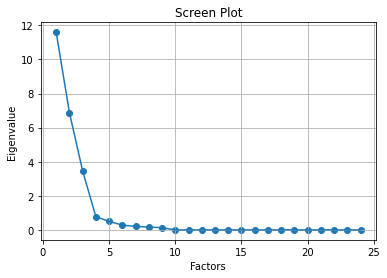

<Figure size 432x288 with 0 Axes>

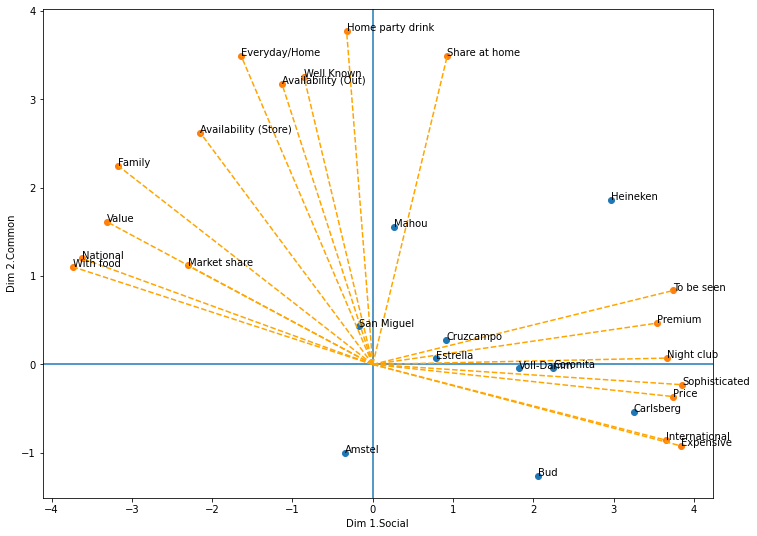

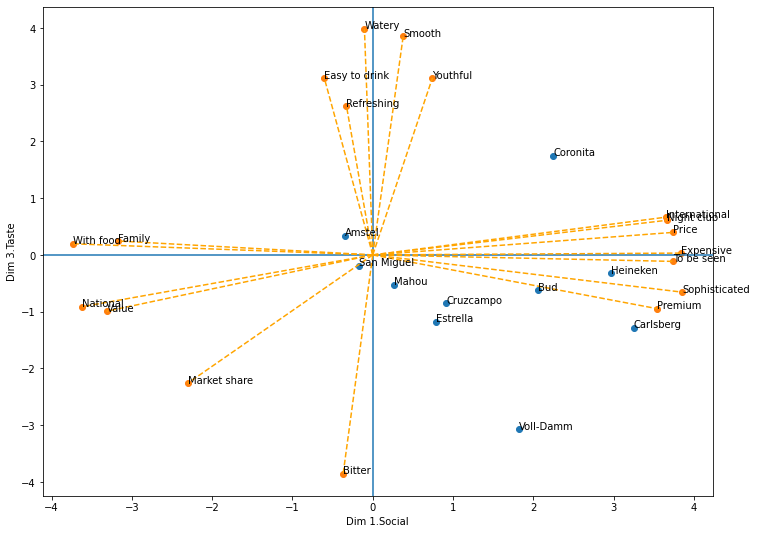

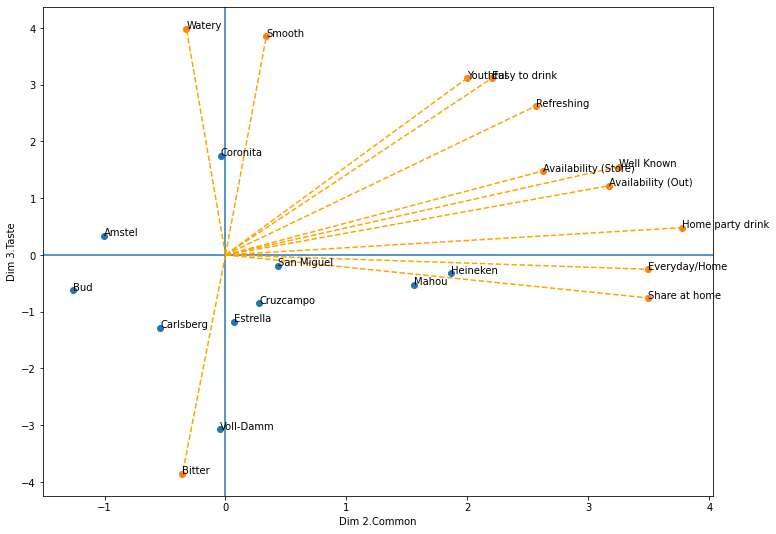

In [3]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
from factor_analyzer.factor_analyzer import calculate_kmo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = 0)

def order_loadings(load_mat, bases):
    load_mat_ord = pd.DataFrame(columns = range(1, len(load_mat[0]) + 1))

    for i in range(0, len(load_mat[0])):
        for j in range(0, len(load_mat)):
            if (np.argmax(abs(load_mat[j])) == i):
                load_mat_ord.loc[bases.columns[j]] = load_mat[j]
    
    return load_mat_ord

def plot_eigenvalue(eigenvalues):
   plt.figure(1)
   plt.scatter(range(1,len(eigenvalues) + 1), eigenvalues)
   plt.plot(range(1,len(eigenvalues) + 1), eigenvalues)
   plt.title('Screen Plot')
   plt.xlabel('Factors')
   plt.ylabel('Eigenvalue')
   plt.grid()
   plt.show()
 
 
def plot_map(fig_ax, matrix, line):
   fig_ax.scatter(matrix.iloc[:,0],matrix.iloc[:,1])

   for i in range(0, len(matrix)):
       fig_ax.annotate(matrix.index[i], (matrix.iloc[i,0], matrix.iloc[i,1]))
       if (line == 1):
           fig_ax.plot([0,matrix.iloc[i,0]],[0,matrix.iloc[i,1]],
linestyle="dashed",color="orange")
           
#load and clean data
org_data = load_data("Heineken.csv")
 
#Determine Bases variables
bases = org_data
 
#Make sure factor analysis is appropriate:
#Run Bartlett test
_, p_value = calculate_bartlett_sphericity(bases)
if(p_value > 0.05):
   print("Bartlett's test failed")
#Run KMO test
_, kmo_val = calculate_kmo(bases)
if(kmo_val < 0.6):
   print("KMO test failed")

#Check to see if 2 or 3 factors are appropriate:
#Run factor analysis with maximum number of factors, plot eigenvalues
  
fa = FactorAnalyzer(n_factors = len(bases.columns), rotation=None)
fa.fit(bases)
eigens, _ = fa.get_eigenvalues()
plot_eigenvalue(eigens)
 
#Run factor analysis with 2 or 3 factors (if appropriate)
num_fac=3

#Generate 2 or 3 dimensional data
fa2 = FactorAnalyzer(n_factors = num_fac, rotation= "varimax")
fa2.fit(bases)
 
#Here you are getting the reduced matrix
mat_2d = fa2.transform(bases)
 
#This is just for convience puts the (martrix mat_2d) in order
mat_2d = pd.DataFrame(mat_2d, index= bases.index)

#Expending the data
load_mat= fa2.loadings_*4


load_mat_ord=order_loadings(load_mat, bases)


#Perceptual Map of Dim1 & Dim2
#Plot perceptual map
#Defining the axis
Brands12=mat_2d.iloc[:,[0,1]]
Attributes12=load_mat_ord.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],[0,1]]
plt.figure(1)
fig, fig_ax= plt.subplots(figsize=(12,9))
#These are making the horizontal and vertical lines on the perceptual map
#The zero is putting lines at the origins
fig_ax.axhline(0)
fig_ax.axvline(0)
#name of the dimensions
fig_ax.set_xlabel("Dim 1.Social")
fig_ax.set_ylabel("Dim 2.Common")
#Update map with attributes and their correlation with factors
#Generate loadings matrix
#Dot is 0
#Line is 1
#plotting the blue dots
plot_map(fig_ax, Brands12,0)
load_mat = fa2.loadings_
#putting the loadings matrix in order
#plotting the orange lines
plot_map(fig_ax, Attributes12,1)
load_mat = fa2.loadings_
 
#Perceptual Map of Dim1 & Dim3
#Plot perceptual map
#Defining the axis
Brands13=mat_2d.iloc[:,[0,2]]
Attributes13=load_mat_ord.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,18,19,20,21,22,23],[0,2]]
plt.figure(2)
fig, fig_ax= plt.subplots(figsize=(12,9))
#these are making the horizontal and vertical lines on the perceptual map
#the zero is putting lines at the origins
fig_ax.axhline(0)
fig_ax.axvline(0)
#name of the dimensions
fig_ax.set_xlabel("Dim 1.Social")
fig_ax.set_ylabel("Dim 3.Taste")
#Update map with attributes and their correlation with factors
#Generate loadings matrix
#Dot is 0
#Line is 1
#plotting the blue dots
plot_map(fig_ax, Brands13,0)
load_mat = fa2.loadings_
#putting the loadings matrix in order
#plotting the orange lines
plot_map(fig_ax, Attributes13,1)
load_mat = fa2.loadings_
 
#Perceptual Map of Dim2 & Dim3
#Plot perceptual map
#Defining the axis
Brands23=mat_2d.iloc[:,[1,2]]
Attributes23=load_mat_ord.iloc[[12,13,14,15,16,17,18,19,20,21,22,23],[1,2]]
plt.figure(3)
fig, fig_ax= plt.subplots(figsize=(12,9))
#these are making the horizontal and vertical lines on the perceptual map
#the zero is putting lines at the origins
fig_ax.axhline(0)
fig_ax.axvline(0)
#name of the dimensions
fig_ax.set_xlabel("Dim 2.Common")
fig_ax.set_ylabel("Dim 3.Taste")
#Update map with attributes and their correlation with factors
#Generate loadings matrix
#Dot is 0
#Line is 1
#plotting the blue dots
plot_map(fig_ax, Brands23,0)
load_mat = fa2.loadings_
#putting the loadings matrix in order
#plotting the orange lines
plot_map(fig_ax, Attributes23,1)
load_mat = fa2.loadings_
 
#In this file, I am creating perceptual maps to get more information about 
#beer with the goal of position the brands compared to one another. Here, I am 
#starting off by setting up the code by importing packages, testing the 
#usability of the raw data and formatting the perceptual map to work with the 
#imported data. I use the eigenvalues to figure out how many dimensions 
#(narrowed down bases) I will use. Then, I create a reduced matrix so I can see
#how compatible the brands are to the dimensions. Next, I made a loading matrix 
#so I can see how the beer attributes correlate with the factors. When creating
#the perceptual maps, I made new variables which looked at the brands and
#attributes which that were associated with specific dimensions. Overall, I 
#created three perceptual maps each of evaluated consumer perception of the 
#brand and displayed a visual interpretation.








 

